In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
k_day_data = pd.read_csv('./history_Index_k_day_data.csv')
k_day_data.head()

,date,code,open,high,low,close,volume,amount,adjustflag
0,2025-03-04,sh.600000,10.10,10.18,10.10,10.16,2039900,20705732.0,3
1,2025-03-04,sh.600000,10.15,10.17,10.12,10.14,1368100,13875736.0,3
2,2025-03-04,sh.600000,10.13,10.17,10.12,10.13,1009000,10235016.0,3
3,2025-03-04,sh.600000,10.13,10.13,10.10,10.13,1833700,18536772.0,3
4,2025-03-04,sh.600000,10.12,10.16,10.12,10.14,584500,5925536.0,3


In [14]:
k_day_data['date'] = pd.to_datetime(k_day_data['date'], format='%Y-%m-%d')
k_day_data.head()

,date,code,open,high,low,close,volume,amount,adjustflag
0,2025-03-04,sh.600000,10.10,10.18,10.10,10.16,2039900,20705732.0,3
1,2025-03-04,sh.600000,10.15,10.17,10.12,10.14,1368100,13875736.0,3
2,2025-03-04,sh.600000,10.13,10.17,10.12,10.13,1009000,10235016.0,3
3,2025-03-04,sh.600000,10.13,10.13,10.10,10.13,1833700,18536772.0,3
4,2025-03-04,sh.600000,10.12,10.16,10.12,10.14,584500,5925536.0,3


In [15]:
k_5min_data = pd.read_csv('./history_Index_k_data.csv')
k_5min_data['time'] = pd.to_datetime(k_5min_data['time'], format='%Y%m%d%H%M%S%f')
k_5min_data.head()


,date,time,code,open,high,low,close,volume,amount,adjustflag
0,2025-03-04,2025-03-04 09:35:00,sh.600000,10.10,10.18,10.10,10.16,2039900,20705732.0,3
1,2025-03-04,2025-03-04 09:40:00,sh.600000,10.15,10.17,10.12,10.14,1368100,13875736.0,3
2,2025-03-04,2025-03-04 09:45:00,sh.600000,10.13,10.17,10.12,10.13,1009000,10235016.0,3
3,2025-03-04,2025-03-04 09:50:00,sh.600000,10.13,10.13,10.10,10.13,1833700,18536772.0,3
4,2025-03-04,2025-03-04 09:55:00,sh.600000,10.12,10.16,10.12,10.14,584500,5925536.0,3


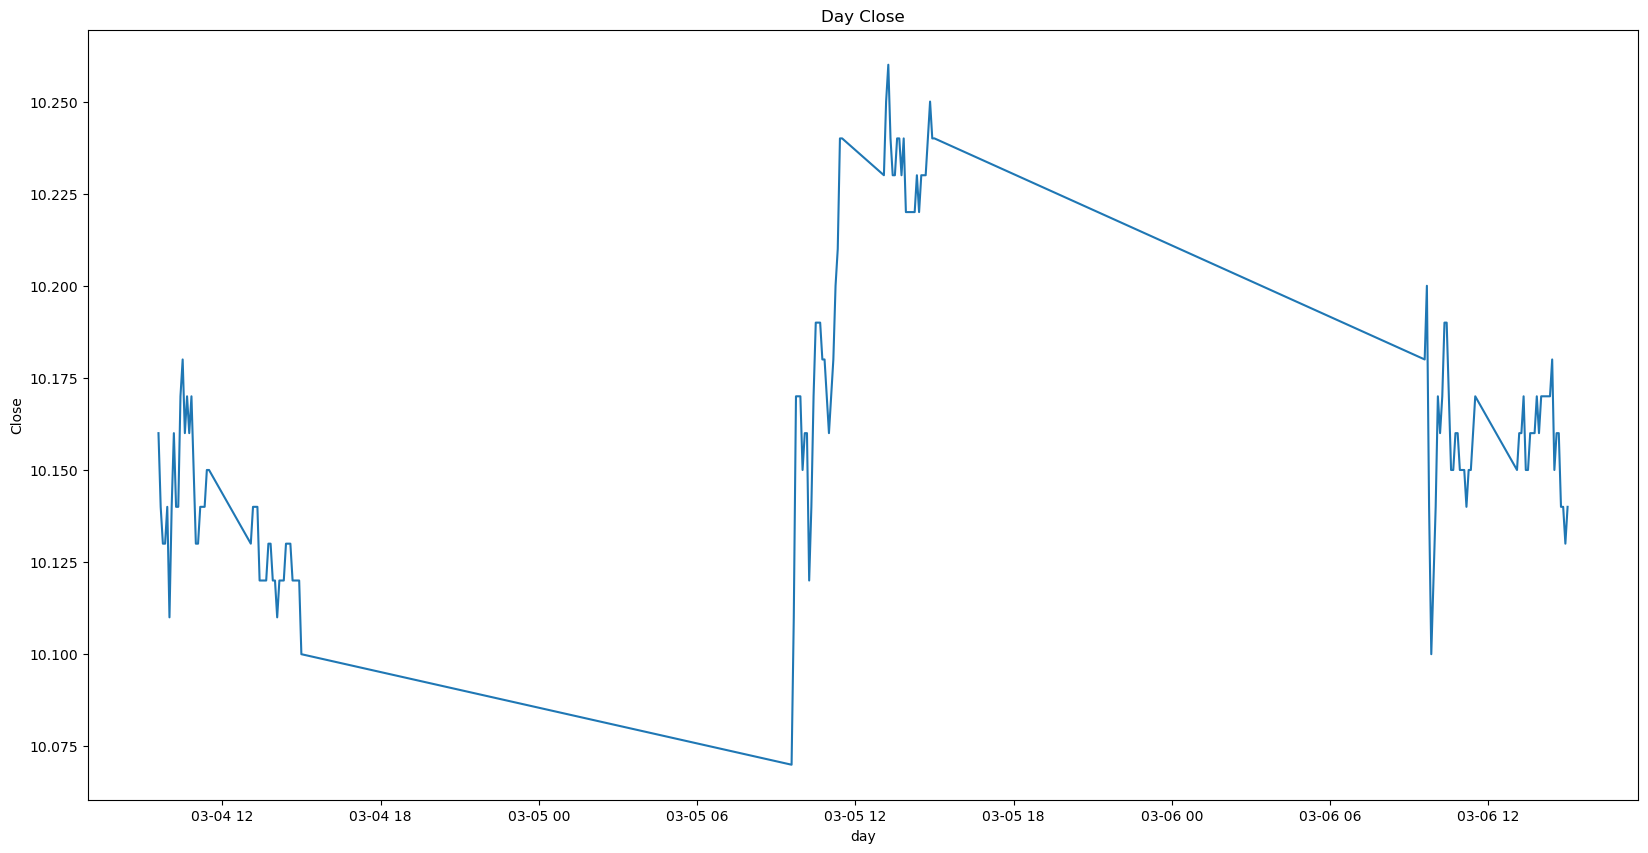

In [16]:
plt.figure(figsize=(20, 10))
plt.plot(k_5min_data['time'], k_5min_data['close'])
plt.xlabel('day')
plt.ylabel('Close')
plt.title('Day Close')
plt.show()


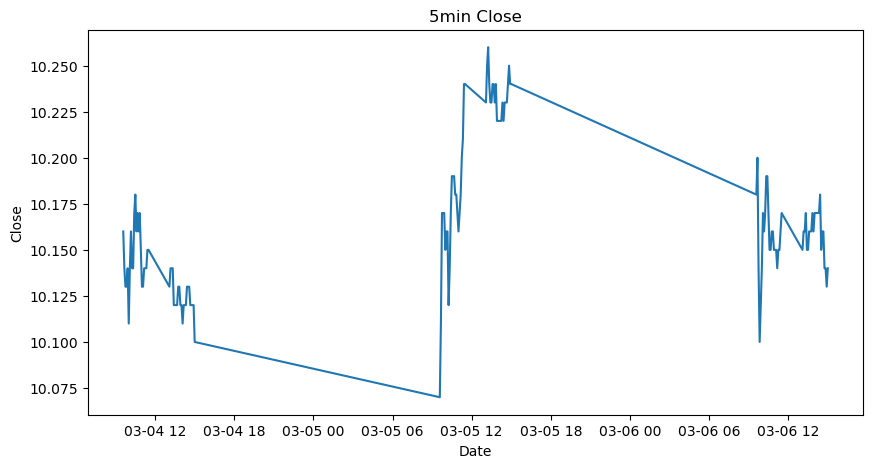

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(k_5min_data['time'], k_5min_data['close'])
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('5min Close')
plt.show()



In [18]:
k_5min_data.set_index('time', inplace=True)
k_5min_data = k_5min_data.resample('5T').asfreq()
k_5min_data.fillna(method='ffill', inplace=True)
k_5min_data.head()

C:\Users\汤汤\AppData\Local\Temp\ipykernel_20316\3823799845.py:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  k_5min_data = k_5min_data.resample('5T').asfreq()
C:\Users\汤汤\AppData\Local\Temp\ipykernel_20316\3823799845.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  k_5min_data.fillna(method='ffill', inplace=True)


,date,code,open,high,low,close,volume,amount,adjustflag
time,,,,,,,,,
2025-03-04 09:35:00,2025-03-04,sh.600000,10.10,10.18,10.10,10.16,2039900.0,20705732.0,3.0
2025-03-04 09:40:00,2025-03-04,sh.600000,10.15,10.17,10.12,10.14,1368100.0,13875736.0,3.0
2025-03-04 09:45:00,2025-03-04,sh.600000,10.13,10.17,10.12,10.13,1009000.0,10235016.0,3.0
2025-03-04 09:50:00,2025-03-04,sh.600000,10.13,10.13,10.10,10.13,1833700.0,18536772.0,3.0
2025-03-04 09:55:00,2025-03-04,sh.600000,10.12,10.16,10.12,10.14,584500.0,5925536.0,3.0


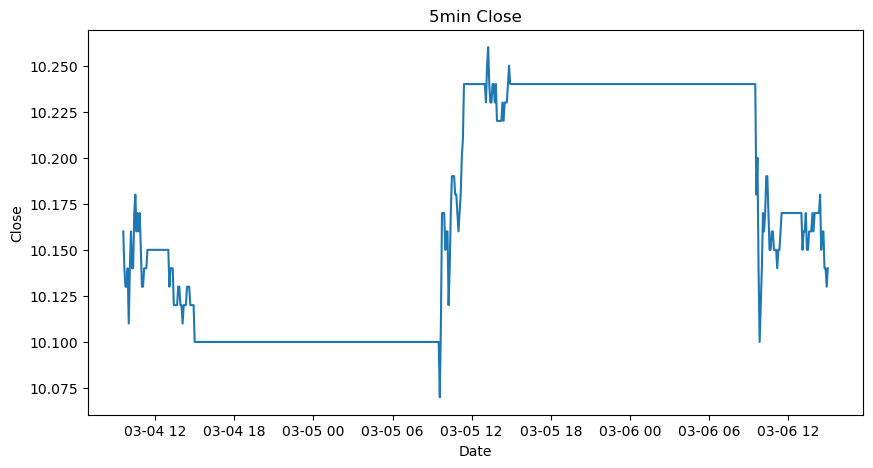

In [19]:
plt.figure(figsize=(10, 5))
plt.plot(k_5min_data.index, k_5min_data['close'])
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('5min Close')
plt.show()

In [20]:
k_5min_data['ema'] = k_5min_data['close'].ewm(span=10, adjust=False).mean()
k_5min_data.head()

,date,code,open,high,low,close,volume,amount,adjustflag,ema
time,,,,,,,,,,
2025-03-04 09:35:00,2025-03-04,sh.600000,10.10,10.18,10.10,10.16,2039900.0,20705732.0,3.0,10.160000
2025-03-04 09:40:00,2025-03-04,sh.600000,10.15,10.17,10.12,10.14,1368100.0,13875736.0,3.0,10.156364
2025-03-04 09:45:00,2025-03-04,sh.600000,10.13,10.17,10.12,10.13,1009000.0,10235016.0,3.0,10.151570
2025-03-04 09:50:00,2025-03-04,sh.600000,10.13,10.13,10.10,10.13,1833700.0,18536772.0,3.0,10.147648
2025-03-04 09:55:00,2025-03-04,sh.600000,10.12,10.16,10.12,10.14,584500.0,5925536.0,3.0,10.146258


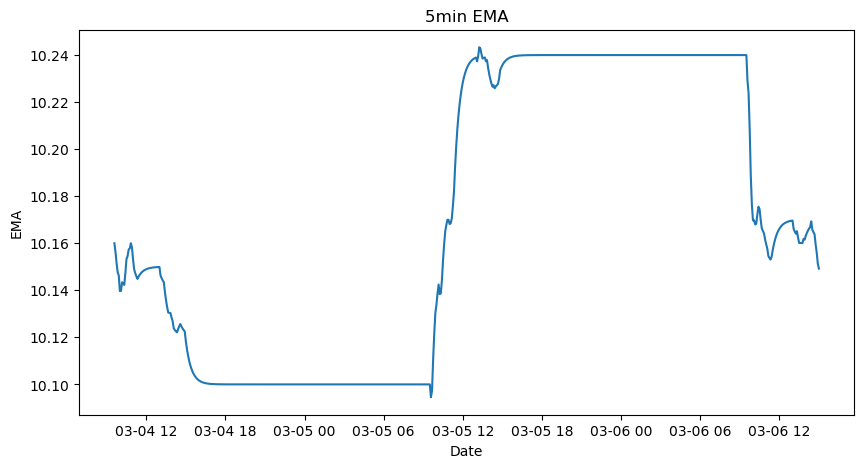

In [21]:
plt.figure(figsize=(10, 5))
plt.plot(k_5min_data.index, k_5min_data['ema'])
plt.xlabel('Date')
plt.ylabel('EMA')
plt.title('5min EMA')
plt.show()